Ogre
==
<p>The Org Chart Maker<br>
by Raygan Henley</p>

#### Cost ####
Cost is not calculated by Ogre. API requests to [OpenAI](https://platform.openai.com) incure a fraction of a cent to complete. Cost is pay-as-you go and requires your own account.

<hr>

#### Software Requirements ####
- Requires
    - OpenAI API Account
    - OPENAI_API_KEY envar
    - pip install openai
    - Graphviz system installation
    - pip install graphviz
    
##### Installation Snips ######

    apt-get install graphviz
    
and

    pip install openai
    pip install graphviz
    
and
    
    mkdir $PATH_TO_OPENAI_API_KEY
    echo 'export OPENAI_API_KEY=$(cat $PATH_TO_OPENAI_API_KEY' >> $BASH_LOGIN_PROFILE


In [9]:
import openai
client = openai.OpenAI()
# requires OPEN_API_KEY to be set in the environment

import json
import graphviz

# GPT Helper
def gpt_simple_request(personality, request):
    completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
        {"role": "system", "content": personality},
        {"role": "user", "content": request}
      ],
      seed=1
    )
    return completion.choices[0].message.content

# Generate Fake Names Map
def call_gpt_generate_fake_names(name_count):
    gpt_personality = """You only return JSON."""
    gpt_fake_name_request = f"""Give me a list of {name_count} random names """ + """from a variety of cultures.
    If the cultural the name is from usually includes a middle name, please include one.
    As an example, Japanese does not use a middle name.
    
    Please give me JSON in this format:
    
        { "names": [ "Bob Thomas Smith", "Nancy Wendy Drew" ] }
    
    """
    result = gpt_simple_request(gpt_personality, gpt_fake_name_request)
    return result

def generate_fake_name_list(pii_list) -> dict:
    _pii_list = pii_list
    fake_name_json = call_gpt_generate_fake_names(len(_pii_list))
    fake_name_dict = json.loads(fake_name_json)
    return { fake: pii for fake,pii in zip(fake_name_dict['names'],_pii_list) }

def generate_fake_persons_in_roles_txt(fake_map, pii_txt):
    for each in fake_map.items():
        pii_txt = pii_txt.replace(each[1], each[0])
    return pii_txt

def replace_fake_with_pii(fake_map, fix_txt):
    for each in fake_map.items():
        fix_txt = fix_txt.replace(each[0], each[1])
    return fix_txt
        

def call_gpt_generate_chart_code(role_hierarchy_txt, persons_in_roles_txt):
    gpt_personality = """You only return Graphviz dot language."""
    gpt_request = f"""

These are our people:
{persons_in_roles_txt}

These are our roles:
{role_hierarchy_txt}
    
Write a graph in the Graphviz dot language that shows the organization of our people.
""" + """
Format it like this:

digraph org_chart {
    graph [bgcolor=white, fontname="Arial"];
    node [shape=box, style="filled", fillcolor="#D8E4FF", fontname="Arial"];
    
    CEO_LP [label="Akira Yamamoto\nCEO / Lead Programmer"];
    VP_Mktg [label="Mia Alvarez Sanchez\nVP of Marketing"];
    CTO [label="Mohan Kapoor Patel\nCTO"];
    Programmer1 [label="Elena Petrova Petrov\nProgrammer"];
    Programmer2 [label="Luca Romano Esposito\nProgrammer"];
    
    CEO_LP -> VP_Mktg;
    CEO_LP -> CTO;
    CEO_LP -> Programmer1;
    CEO_LP -> Programmer2;
}
    """
    dot_src = gpt_simple_request(gpt_personality, gpt_request)
    if '```' in dot_src:
        dot_src = dot_src.split('```')[1].strip('dot')
    return dot_src

def ogre(pii_list, role_hierarchy):
    persons_in_roles = pii_list
    pii_list = [ name for name in [ each.split(',')[0] for each in pii_list.split('\n') ] if name != '' ]
    fake_map = generate_fake_name_list(pii_list)
    fake_persons_in_roles = generate_fake_persons_in_roles_txt(fake_map, persons_in_roles)
    dot_src = call_gpt_generate_chart_code(role_hierarchy, fake_persons_in_roles)
    dot_src_pii = replace_fake_with_pii(fake_map, dot_src)
    return dot_src_pii

Design Notes
--

Make an Org Chart:

    org_chart = ogre(pii_list, role_hierarchy)

1. prepare the org data
    1. PII name list, including roles
    1. role hierarchy description
1. hide the PII
    1. generate fake name list
    1. map the PII names to the fake names
1. generate chart code
    1. send the input to the chart maker
    1. receive output from the chart maker
    1. sanitize the output
    1. format the output
    1. fix the output
        1. send the output to the chart fixer
        1. receive the fixed output from the chart fixer
    1. replace fake names with PI names
1. render the chart
    1. send the chart code to the chart renderer
    2. receive the chart image from the chart renderer
2. save the chart

Test
--

Prepare the Org Data
--

In [10]:
role_hierarchy = """
CEO / Lead Programmer
    Programmer
    VP of Sales
        Sales Associate
    CTO
    COO
"""

pii_list = """
Raygan Henley, CEO and Lead Programmer
Gary Little, VP of Sales
Jane Turner, COO
Phil Delaney, Programmer
Doogie Padooley, Programmer
LaShonda Stiles, Programmer
Peter Gunn, Sales Associate
Gary Sanders, Sales Associate
"""

Execute
--

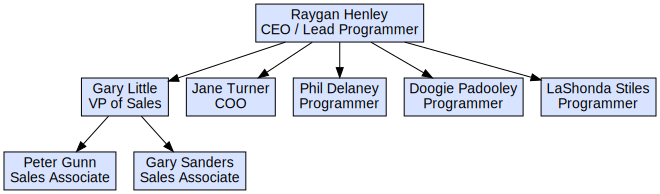

In [11]:
dot_src_pii = ogre(pii_list, role_hierarchy)
orgchart = graphviz.Source(dot_src_pii)
orgchart

In [12]:
call_gpt_generate_fake_names(2)

'{\n    "names": ["Akira Shinji Kaneko", "Sofia Isabella Rodriguez"]\n}'

!pip install openai

In [6]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 456.3 kB/s eta 0:00:001m3.8 MB/s eta 0:00:01
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.13.1-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible